In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
# Import the data
data = pd.read_csv("zusammen.csv")


In [56]:
data.describe()

,wert,rohwert,temp,dwpt,rhum,prcp
count,23910.000000,23910.000000,23910.000000,23736.000000,23736.000000,23910.000000
mean,18.937599,18.484518,12.259506,7.298934,74.726196,0.081054
std,10.183750,10.645815,7.162950,5.700729,18.004987,0.525109
min,10.000000,-1.231650,-9.300000,-11.700000,17.000000,0.000000
25%,11.000000,11.308500,6.800000,3.000000,63.000000,0.000000
50%,16.000000,16.212000,11.800000,7.400000,79.000000,0.000000
75%,23.000000,22.932000,17.300000,11.800000,90.000000,0.000000
max,168.000000,168.105000,39.000000,21.100000,100.000000,33.600000


In [57]:
data.isnull().sum()

date         0
time         0
wert         0
rohwert      0
temp         0
dwpt       174
rhum       174
prcp         0
dtype: int64

In [58]:
# Drop the column `wert`
data =data.drop("wert", axis=1)
data=data.dropna(axis=0)


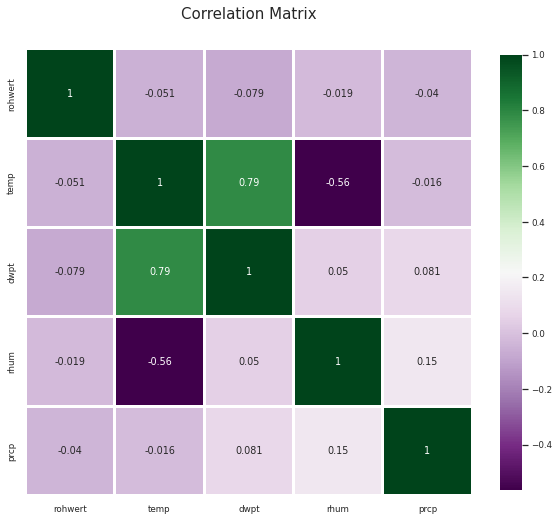

In [59]:
corr = data.corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(corr, square=True, cmap="PRGn", linewidths=2, annot=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Matrix", fontsize=15, pad=30)
plt.show()

In [60]:
split=data['date'].str.split('-',expand=True)
split= split.rename(columns={0: 'year', 1: 'Month',2: 'date'})
split.drop(['year'], axis=1, inplace=True)
split.drop(['date'], axis=1, inplace=True)
data.drop(['date'], axis=1, inplace=True)

split

,Month
0,01
1,01
2,01
3,01
4,01
...,...
23905,09
23906,09
23907,09
23908,09


In [61]:
split1=data['time'].str.split(':',expand=True)
split1= split1.rename(columns={0: 'time', 1: 'Month',2: 'date'})
print(split1)

      time Month date
0       00    00   00
1       07    00   00
2       06    00   00
3       05    00   00
4       04    00   00
...    ...   ...  ...
23905   20    00   00
23906   21    00   00
23907   22    00   00
23908   23    00   00
23909   00    00   00

[23736 rows x 3 columns]


In [62]:
split1.drop(['date'], axis=1, inplace=True)
split1.drop(['Month'], axis=1, inplace=True)
data.drop(['time'], axis=1, inplace=True)



In [63]:
train=pd.concat([split,split1,data], axis=1)
train

,Month,time,rohwert,temp,dwpt,rhum,prcp
0,01,00,36.1305,1.0,-0.6,89.0,0.0
1,01,07,30.5445,0.1,-1.2,91.0,0.0
2,01,06,31.9620,-0.3,-1.3,93.0,0.0
3,01,05,27.3315,-0.5,-1.2,95.0,0.0
4,01,04,38.2620,-0.4,-0.8,97.0,0.0
...,...,...,...,...,...,...,...
23905,09,20,27.0270,12.9,7.3,69.0,0.0
23906,09,21,29.6940,13.1,7.3,68.0,0.0
23907,09,22,36.9495,12.7,7.6,71.0,0.0
23908,09,23,27.4155,12.6,7.5,71.0,0.0


In [64]:
train = train.rename(columns={
    "rohwert": "value",
    "dwpt": "dew point",
    "rhum": "relative Humidity",
    "temp": "temperature",
    "prcp": "precipitation"
})


In [65]:
train['Month'] = train['Month'].astype(float)
train['time'] = train['time'].astype(float)

In [66]:
def normalize_data(data):
  """Normalizes data between the range of 0 to 1.

  Args:
    data: The data to be normalized.

  Returns:
    The normalized data.
  """

  max_value = np.max(data)
  min_value = np.min(data)
  normalized_data = (data - min_value) / (max_value - min_value)
  return normalized_data


In [67]:
train=normalize_data(train)
train

,Month,time,value,temperature,dew point,relative Humidity,precipitation
0,0.000000,0.000000,0.220638,0.213251,0.338415,0.867470,0.0
1,0.000000,0.304348,0.187651,0.194617,0.320122,0.891566,0.0
2,0.000000,0.260870,0.196022,0.186335,0.317073,0.915663,0.0
3,0.000000,0.217391,0.168677,0.182195,0.320122,0.939759,0.0
4,0.000000,0.173913,0.233226,0.184265,0.332317,0.963855,0.0
...,...,...,...,...,...,...,...
23905,0.727273,0.869565,0.166879,0.459627,0.579268,0.626506,0.0
23906,0.727273,0.913043,0.182628,0.463768,0.579268,0.614458,0.0
23907,0.727273,0.956522,0.225475,0.455487,0.588415,0.650602,0.0
23908,0.727273,1.000000,0.169173,0.453416,0.585366,0.650602,0.0


In [69]:
X_train, X_test, y_train, y_test = train_test_split(train, train["value"], test_size=0.25)

In [70]:
model = MLPRegressor(hidden_layer_sizes=(100, 100), activation="relu", solver="adam", learning_rate="constant", learning_rate_init=0.001)


In [71]:
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 100))

In [72]:
aqi_prediction = model.predict(X_test)


In [73]:
print("Mean squared error:", np.mean((aqi_prediction - y_test)**2))

Mean squared error: 8.648392527927289e-06


In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def evaluate_model(model, X_test, y_test):
 

  y_pred = model.predict(X_test)
  MSE = mean_squared_error(y_test, y_pred)
  #RMSE = root_mean_squared_error(y_test, y_pred)
  MAE = mean_absolute_error(y_test, y_pred)

  return MSE, MAE

In [93]:
MSE, MAE = evaluate_model(model, X_test, y_test)

print("MSE:", MSE)

print("MAE:", MAE)

MSE: 8.648392527927289e-06
MAE: 0.0025114342948433115
